# lire data

In [2]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install  scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('..\insulin_bioactivity_data_3class_pIC50_pubchem_fp.csv')

# pubchem finger print

In [4]:
data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.69897
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
1658,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.00000
1659,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.30103
1660,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.30103


drop pic50 col to asigne it to the X variable

In [5]:
X=data.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1658,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1659,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1660,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### drop last col and asigne it to var Y

In [6]:
Y=data.iloc[ :,-1]
Y

0       4.30103
1       4.30103
2       4.30103
3       3.69897
4       4.30103
         ...   
1657    3.00000
1658    4.00000
1659    6.30103
1660    6.30103
1661    5.00000
Name: pIC50, Length: 1662, dtype: float64

enleve les features avec faible variation

In [7]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP13,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,...,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP812,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP826,PubchemFP833
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1658,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1659,0,0,1,0,1,0,1,1,0,0,...,1,1,1,0,0,1,0,0,0,0
1660,0,0,0,0,1,0,1,1,0,0,...,1,1,1,0,0,1,0,0,0,0


In [8]:
X.to_csv('descriptor_list.csv', index = False)


# Random Forest Regression Model

In [9]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9161440115421705

# Model Prediction

In [12]:
Y_pred = model.predict(X)
Y_pred

array([4.36504016, 4.31984124, 4.88737577, ..., 6.00745703, 6.13389602,
       5.22664379])

# Model Performance

In [13]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))


Mean squared error (MSE): 0.11
Coefficient of determination (R^2): 0.92


# Data Visualization(Experimental vs Predicted pIC50 for Training Data)

In [14]:
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 0, 'Experimental pIC50')

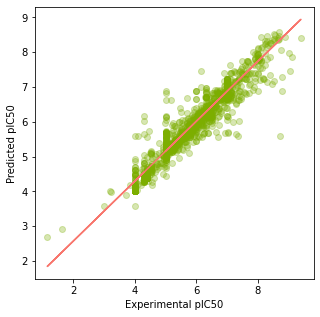

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# enregistrer le  Modele comme Pickle Object

In [16]:
import pickle


In [17]:
pickle.dump(model, open('insulin_model.pkl', 'wb'))
